In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

#algoritmos
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



Leitura do dataset:

In [ ]:
df = pd.read_csv("C:/Users/Gustavo_Aldama/Jedi/Jedi/fraud_detection_bank_dataset.csv")

Extração dos dados do arquivo:

In [ ]:
X = df.drop(["targets"], axis = 1).values
y = df["targets"].values

Divisão dos dados em treinamento + teste e validação no formato 80/20:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.20)

Processamento dos dados para uso nos algoritmos:

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Aplicação do SVM, com kernel rbf, com validação cruzada de k=5 para descobrir qual melhor parâmetro:

In [ ]:
param_grid = {'gamma': [1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}
grid = GridSearchCV(SVC(), param_grid, cv = 5)
grid.fit(X_train, y_train)
(grid.best_params_)
(grid.best_estimator_)

SVC(gamma=0.01)

<AxesSubplot:>

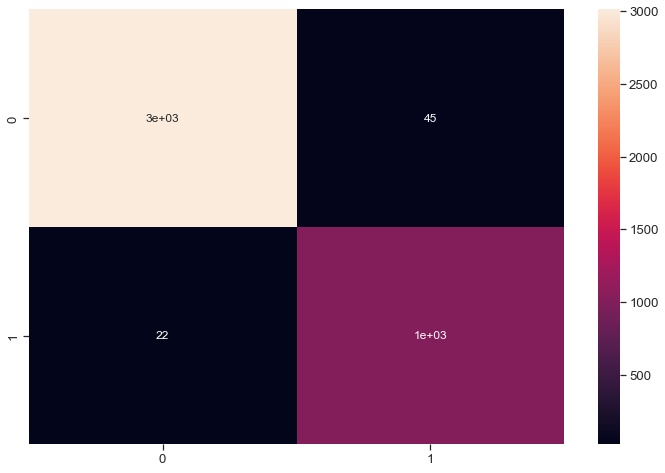

In [ ]:
pred = grid.predict(X_test)

c_matrix = confusion_matrix(pred, y_test)

sns.set(style="ticks", color_codes=True, rc={"figure.figsize": (12, 8)}, font_scale=1.2)
sns.heatmap(c_matrix, annot=True, annot_kws={"size": 12})

In [ ]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3033
           1       0.98      0.96      0.97      1061

    accuracy                           0.98      4094
   macro avg       0.98      0.98      0.98      4094
weighted avg       0.98      0.98      0.98      4094



Aplicação do KNN, com validação cruzada de k=5 para descobrir qual melhor parâmetro:

In [ ]:
param_grid2 = {'gamma': [3,4,5,6,7,8,9],'kernel':['rbf']}
k_range = list(range(100, 200))
param_grid2 = dict(n_neighbors=k_range)
grid2 = GridSearchCV(KNeighborsClassifier(), param_grid2, cv = 5)
grid2.fit(X_train, y_train)
print((grid2.best_params_))
(grid2.best_estimator_)

{'n_neighbors': 145}


KNeighborsClassifier(n_neighbors=145)

<AxesSubplot:>

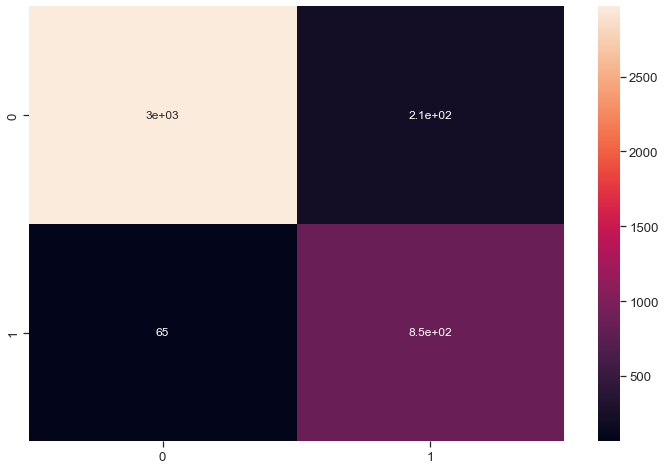

In [ ]:
pred2 = grid2.predict(X_test)

c_matrix2 = confusion_matrix(pred2, y_test)

sns.set(style="ticks", color_codes=True, rc={"figure.figsize": (12, 8)}, font_scale=1.2)
sns.heatmap(c_matrix2, annot=True, annot_kws={"size": 12})

In [ ]:
grid2_predictions = grid2.predict(X_test)
print(classification_report(y_test, grid2_predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      3033
           1       0.93      0.80      0.86      1061

    accuracy                           0.93      4094
   macro avg       0.93      0.89      0.91      4094
weighted avg       0.93      0.93      0.93      4094

